<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(_1_6)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.6_n250.csv',
 'data_multi_delta_-1.6_n120.csv',
 'data_multi_delta_-1.6_n60.csv',
 'data_multi_delta_-1.6_n30.csv',
 'data_multi_delta_-1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,29.488940,94.459156,47.651417,98.091318,-0.080445,279.610387,279.681276,-0.070889
1,0.0,1.0,21.801127,61.548168,96.527427,29.623432,-0.110507,219.389646,219.497725,-0.108079
2,0.0,2.0,29.321361,99.046438,68.402879,45.946167,-0.019249,252.697596,252.715263,-0.017668
3,0.0,3.0,77.910696,56.352487,64.372066,77.704208,-0.022387,286.317071,286.339085,-0.022014
4,0.0,4.0,47.965370,66.779474,95.226097,40.297706,-0.055516,260.213130,260.267943,-0.054813
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,78.175201,95.486102,40.681304,32.616564,-0.020976,256.938195,256.954299,-0.016103
249996,999.0,246.0,57.262710,31.552694,29.297838,40.877299,-0.109110,168.881430,168.977467,-0.096037
249997,999.0,247.0,22.296046,77.976737,70.879325,25.316737,-0.046537,206.422308,206.466049,-0.043741
249998,999.0,248.0,27.581184,44.752954,67.599136,91.457425,0.032277,241.422977,241.393588,0.029389


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,29.488940,94.459156,47.651417,98.091318,-0.080445,279.610387,279.681276,-0.070889
1,0.0,1.0,21.801127,61.548168,96.527427,29.623432,-0.110507,219.389646,219.497725,-0.108079
2,0.0,2.0,29.321361,99.046438,68.402879,45.946167,-0.019249,252.697596,252.715263,-0.017668
3,0.0,3.0,77.910696,56.352487,64.372066,77.704208,-0.022387,286.317071,286.339085,-0.022014
4,0.0,4.0,47.965370,66.779474,95.226097,40.297706,-0.055516,260.213130,260.267943,-0.054813
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,78.175201,95.486102,40.681304,32.616564,-0.020976,256.938195,256.954299,-0.016103
249996,999.0,246.0,57.262710,31.552694,29.297838,40.877299,-0.109110,168.881430,168.977467,-0.096037
249997,999.0,247.0,22.296046,77.976737,70.879325,25.316737,-0.046537,206.422308,206.466049,-0.043741
249998,999.0,248.0,27.581184,44.752954,67.599136,91.457425,0.032277,241.422977,241.393588,0.029389


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    29.488940  94.459156  47.651417  98.091318 -0.080445  279.610387   
      1.0    21.801127  61.548168  96.527427  29.623432 -0.110507  219.389646   
      2.0    29.321361  99.046438  68.402879  45.946167 -0.019249  252.697596   
      3.0    77.910696  56.352487  64.372066  77.704208 -0.022387  286.317071   
      4.0    47.965370  66.779474  95.226097  40.297706 -0.055516  260.213130   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  78.175201  95.486102  40.681304  32.616564 -0.020976  256.938195   
      246.0  57.262710  31.552694  29.297838  40.877299 -0.109110  168.881430   
      247.0  22.296046  77.976737  70.879325  25.316737 -0.046537  206.422308   
      248.0  27.581184  44.752954  67.599136  91.457425  0.032277  241.422977   
      249.0  95.069699  84.824440  20.331204  95.185963  0.033907  305.445213   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    279.681276 -0.070889  
      1.0    219.497725 -0.108079  
      2.0    252.715263 -0.017668  
      3.0    286.339085 -0.022014  
      4.0    260.267943 -0.054813  
...                 ...       ...  
999.0 245.0  256.954299 -0.016103  
      246.0  168.977467 -0.096037  
      247.0  206.466049 -0.043741  
      248.0  241.393588  0.029389  
      249.0  305.411563  0.033650  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    29.488940  94.459156  47.651417  98.091318 -0.080445  279.610387   
      1.0    21.801127  61.548168  96.527427  29.623432 -0.110507  219.389646   
      2.0    29.321361  99.046438  68.402879  45.946167 -0.019249  252.697596   
      3.0    77.910696  56.352487  64.372066  77.704208 -0.022387  286.317071   
      4.0    47.965370  66.779474  95.226097  40.297706 -0.055516  260.213130   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  78.175201  95.486102  40.681304  32.616564 -0.020976  256.938195   
      246.0  57.262710  31.552694  29.297838  40.877299 -0.109110  168.881430   
      247.0  22.296046  77.976737  70.879325  25.316737 -0.046537  206.422308   
      248.0  27.581184  44.752954  67.599136  91.457425  0.032277  241.422977   
      249.0  95.069699  84.824440  20.331204  95.185963  0.033907  305.445213   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    279.681276 -0.070889  
      1.0    219.497725 -0.108079  
      2.0    252.715263 -0.017668  
      3.0    286.339085 -0.022014  
      4.0    260.267943 -0.054813  
...                 ...       ...  
999.0 245.0  256.954299 -0.016103  
      246.0  168.977467 -0.096037  
      247.0  206.466049 -0.043741  
      248.0  241.393588  0.029389  
      249.0  305.411563  0.033650  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,29.488940,94.459156,47.651417,98.091318,-0.080445,279.610387,279.681276,-0.070889
1,0.0,1.0,21.801127,61.548168,96.527427,29.623432,-0.110507,219.389646,219.497725,-0.108079
2,0.0,2.0,29.321361,99.046438,68.402879,45.946167,-0.019249,252.697596,252.715263,-0.017668
3,0.0,3.0,77.910696,56.352487,64.372066,77.704208,-0.022387,286.317071,286.339085,-0.022014
4,0.0,4.0,47.965370,66.779474,95.226097,40.297706,-0.055516,260.213130,260.267943,-0.054813
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,78.175201,95.486102,40.681304,32.616564,-0.020976,256.938195,256.954299,-0.016103
249996,999.0,246.0,57.262710,31.552694,29.297838,40.877299,-0.109110,168.881430,168.977467,-0.096037
249997,999.0,247.0,22.296046,77.976737,70.879325,25.316737,-0.046537,206.422308,206.466049,-0.043741
249998,999.0,248.0,27.581184,44.752954,67.599136,91.457425,0.032277,241.422977,241.393588,0.029389


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    29.488940  94.459156  47.651417  98.091318 -0.080445  279.610387   
      1.0    21.801127  61.548168  96.527427  29.623432 -0.110507  219.389646   
      2.0    29.321361  99.046438  68.402879  45.946167 -0.019249  252.697596   
      3.0    77.910696  56.352487  64.372066  77.704208 -0.022387  286.317071   
      4.0    47.965370  66.779474  95.226097  40.297706 -0.055516  260.213130   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  78.175201  95.486102  40.681304  32.616564 -0.020976  256.938195   
      246.0  57.262710  31.552694  29.297838  40.877299 -0.109110  168.881430   
      247.0  22.296046  77.976737  70.879325  25.316737 -0.046537  206.422308   
      248.0  27.581184  44.752954  67.599136  91.457425  0.032277  241.422977   
      249.0  95.069699  84.824440  20.331204  95.185963  0.033907  305.445213   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    279.681276 -0.070889  
      1.0    219.497725 -0.108079  
      2.0    252.715263 -0.017668  
      3.0    286.339085 -0.022014  
      4.0    260.267943 -0.054813  
...                 ...       ...  
999.0 245.0  256.954299 -0.016103  
      246.0  168.977467 -0.096037  
      247.0  206.466049 -0.043741  
      248.0  241.393588  0.029389  
      249.0  305.411563  0.033650  

[250000 rows x 8 columns]

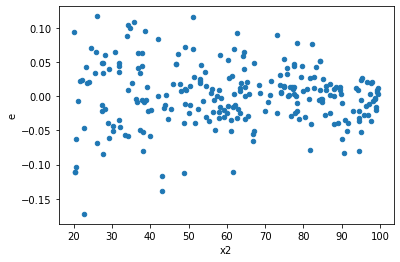

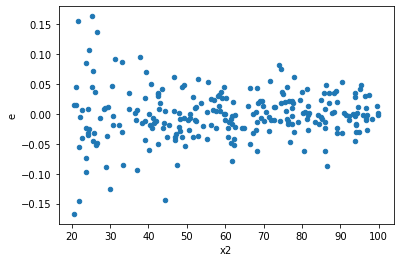

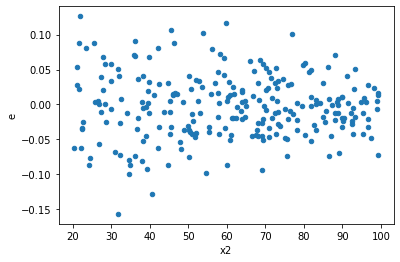

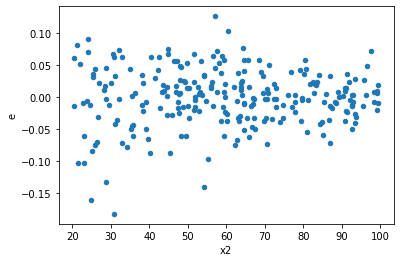

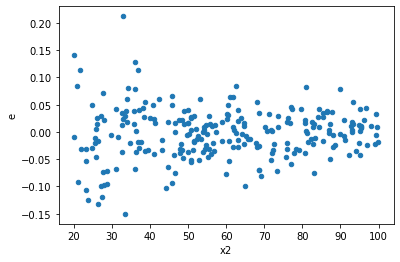

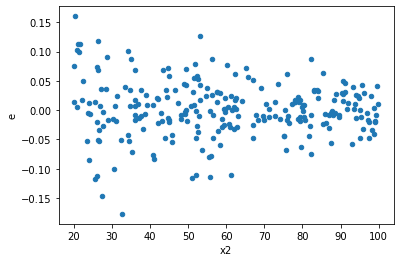

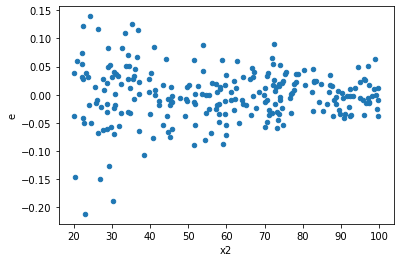

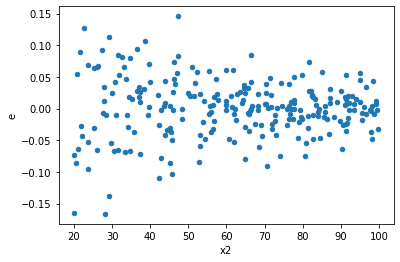

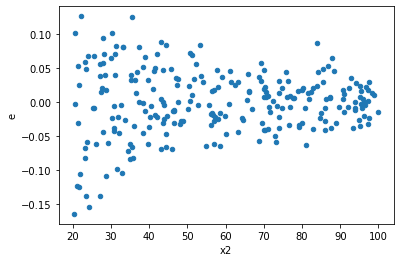

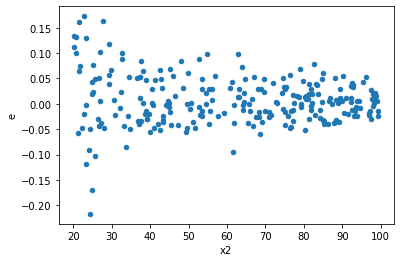

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
44.0,96.0,96.0,0.18492266046638392,0.1886203342303004,0.0019262777131914992,0.001964795148232296,1.019995785019482,0.9229333646236872,0.5385333176881564,0.4614666823118436,Reject001=1 : Homoscedasticity
155.0,96.0,96.0,0.26585932649448013,0.2744338085327109,0.002769367984317501,0.0028586855055490715,1.0322519512529074,0.8767428534302901,0.5616285732848549,0.43837142671514506,Reject001=1 : Homoscedasticity
185.0,96.0,96.0,0.20463671680779816,0.2095002572592244,0.0021316324667478973,0.002182294346450254,1.0237667048577321,0.9086274714524636,0.5456862642737682,0.4543137357262318,Reject001=1 : Homoscedasticity
563.0,96.0,96.0,0.18992488319267264,0.22402773441192023,0.0019783841999236732,0.0023336222334575025,1.1795596798374828,0.4199760382672293,0.7900119808663854,0.20998801913361465,Reject001=1 : Homoscedasticity
581.0,96.0,96.0,0.18238949106530433,0.20747280317584776,0.0018998905319302535,0.0021611750330817474,1.13752608203486,0.5290851491159887,0.7354574254420057,0.26454257455799435,Reject001=1 : Homoscedasticity
582.0,96.0,96.0,0.14801901833602257,0.16432521668422087,0.0015418647743335684,0.0017117210071273007,1.1101628596886186,0.6096809206452349,0.6951595396773825,0.30484046032261747,Reject001=1 : Homoscedasticity
751.0,96.0,96.0,0.15208106368248986,0.19354537847859676,0.0015841777466926027,0.002016097692485383,1.2726461387899997,0.23933700376928546,0.8803314981153573,0.11966850188464273,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,0.24764124568860094,0.14999471064338987,0.00257959630925626,0.001562444902535311,0.6056935718696969,0.014799499506959623,Reject001=1 : Homoscedasticity
1.0,96.0,96.0,0.22367862124828983,0.1097304281873783,0.002329985638003019,0.001143025293618524,0.4905718194032246,0.0005726786258504873,Reject001=0 : Heteroscedasticity
2.0,96.0,96.0,0.2694826733706141,0.17575613322530811,0.0028071111809438967,0.0018307930544302928,0.6521982694731332,0.03747381570048866,Reject001=1 : Homoscedasticity
3.0,96.0,96.0,0.246937510374093,0.09890811190272464,0.0025722657330634687,0.0010302928323200483,0.40053903415842246,1.1009529327943301e-05,Reject001=0 : Heteroscedasticity
4.0,96.0,96.0,0.28536808107046696,0.14395997030324337,0.002972584177817364,0.0014995830239921185,0.5044711719797942,0.0009273558765448368,Reject001=0 : Heteroscedasticity
5.0,96.0,96.0,0.24750554028371102,0.172024584751383,0.0025781827112886565,0.001791922757826906,0.6950332689692295,0.07627187212134097,Reject001=1 : Homoscedasticity
6.0,96.0,96.0,0.34097759371144026,0.13669272174768726,0.0035518499344941693,0.0014238825182050757,0.40088476271953066,1.1214722484120046e-05,Reject001=0 : Heteroscedasticity
7.0,96.0,96.0,0.2920782731018972,0.11519787510340548,0.003042482011478096,0.0011999778656604737,0.3944075465798733,7.895260981735036e-06,Reject001=0 : Heteroscedasticity
8.0,96.0,96.0,0.2709345821355814,0.14543809662440343,0.002822235230578973,0.0015149801731708691,0.536801524109695,0.002561914501691505,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    730
Reject001=1 : Homoscedasticity      270
Name: Result_test, dtype: int64